For Text Mining assignment
 
ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)


In [1]:
!pip install spacy

In [3]:
!pip install WordCloud

In [16]:
# importing libraries
import pandas as pd
import numpy as np
import string

import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from wordcloud import WordCloud

import spacy
import nltk

%matplotlib inline

In [8]:
tweets_data = pd.read_csv('Elon_musk.csv', encoding = 'latin1', error_bad_lines=False)
tweets_data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [9]:
tweets_data.shape

(1999, 2)

In [11]:
tweets_data = tweets_data.drop('Unnamed: 0', axis = 1)
tweets_data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [12]:
# removing both the leading and the trailing characters such as spaces in tweets
tweets_data = [x.strip() for x in tweets_data.Text]

In [14]:
tweets_data[0:5]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(tweets_data))
sentences[0:5]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!']

In [54]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re

filtered_sent=[]
for i in range(len(sentences)):
    review = re.sub("[^A-Za-z" "]+"," ",sentences[i])
    review = re.sub("[0-9" "]+"," ",sentences[i])
    
    review = review.lower()
    review =review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    filtered_sent.append(review)

In [56]:
filtered_sent[0:5]

['@kunalb i\x92m alien @id_aa_carmack ray tracing cyberpunk hdr next-level.',
 'tried it?',
 '@joerogan @spotify great interview!',
 '@gtera doge underestimated @teslacn congratulation tesla china amazing execution last year.',
 'next even more!!']

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf = tf.fit_transform(filtered_sent)
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
sentences_df =pd.DataFrame(denselist, columns=feature_names)
sentences_df.head()

,_bennettm_,_extrachars,_rykllan,_t,_teslatom,a_howard,aayypcpp,ab,aber,able,...,zugaquvpy,zvm,zwiebelbach,zxd,zyf,zyj,zynsxisp,zz,zzcool,ðogecoin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df.head()

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!


In [47]:
with open("positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")
    
with open("negative-words.txt","r") as neg:
    negwords = neg.read().split("\n")
  

In [48]:
pos_words = poswords[35:]
pos_words

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [53]:
neg_words = negwords[35:]
neg_words

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


In [90]:
#plotting wordcloud on TFIDF
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = ' '.join(sentences_df)
#cloud

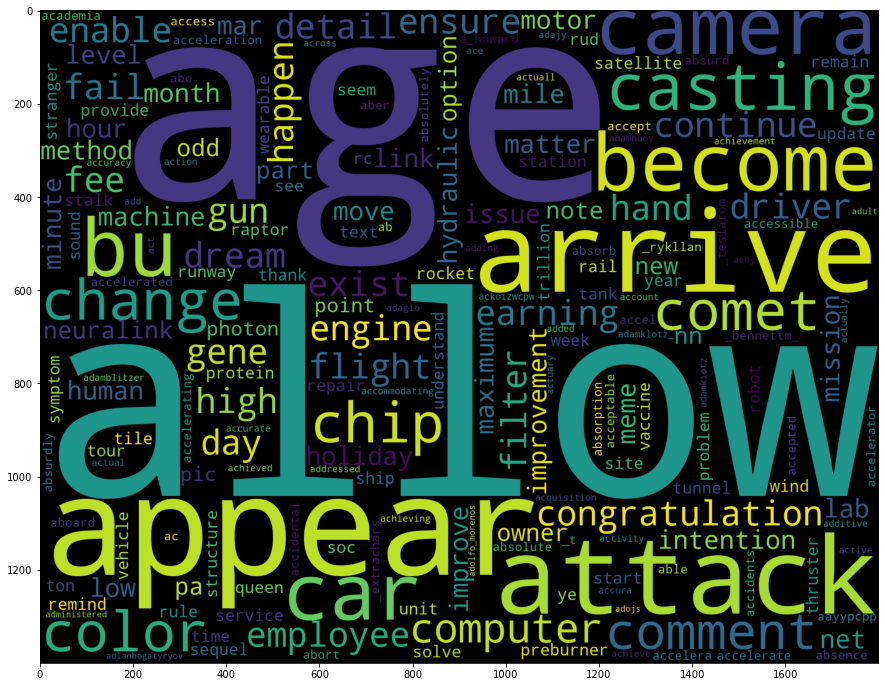

In [74]:
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(cloud)
plt.imshow(wordcloud)

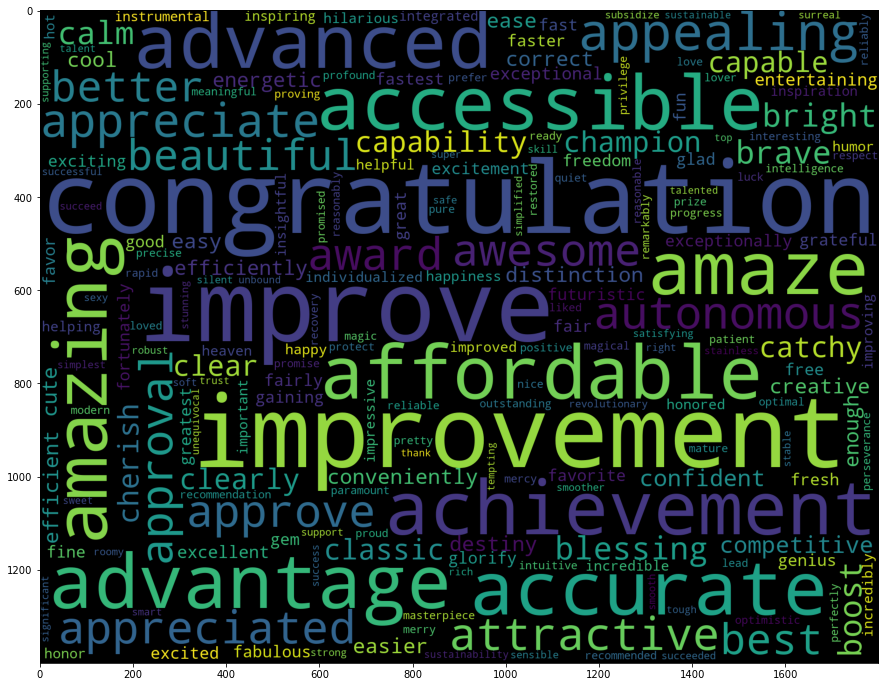

In [72]:
f, axes = plt.subplots(figsize=(20,12))
pos_words = ' '.join([w for w in sentences_df if w in poswords])

cloud_pos = WordCloud(
        background_color = 'black',
        width =1800,
        height=1400).generate(pos_words)
plt.imshow(cloud_pos)

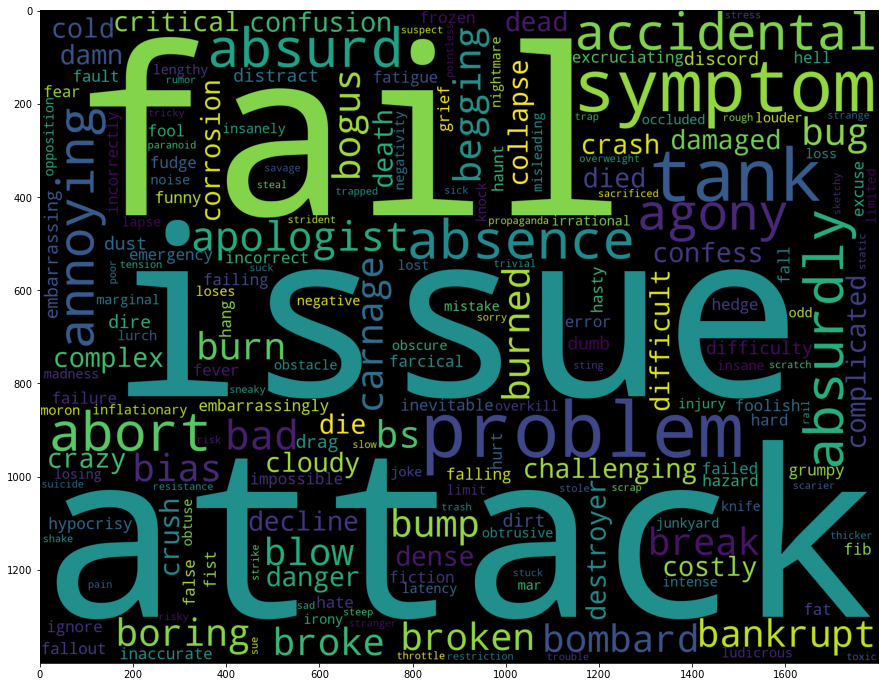

In [73]:
f, axes = plt.subplots(figsize=(20,12))
neg_words = ' '.join([w for w in sentences_df if w in negwords])

cloud_neg = WordCloud(
        background_color='black',
        width =1800,
        height =1400).generate(neg_words)
plt.imshow(cloud_neg)

#### Affinity scores:


In [77]:
with open("afinn2.txt","r") as affin:
    affinity = affin.read().split("\n")

In [81]:
affinity_data = pd.read_csv('afinn2.txt', sep="\t", header=None, names=["word", "value"])
affinity_data.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [85]:
affinity_scores = affinity_data.set_index('word')['value'].to_dict()
#affinity_scores

In [86]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [87]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [88]:
calculate_sentiment(text = 'good')

3

In [92]:
sentences_df

,_bennettm_,_extrachars,_rykllan,_t,_teslatom,a_howard,aayypcpp,ab,aber,able,...,zugaquvpy,zvm,zwiebelbach,zxd,zyf,zyj,zynsxisp,zz,zzcool,ðogecoin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df.head()

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0


In [104]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df.head()

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8


In [106]:
sent_df.sort_values(by='sentiment_value')
sent_df.head()

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8


In [107]:
sent_df['sentiment_value'].max()

17

In [113]:

# tweet which is having max sentiment value
sent_df[sent_df['sentiment_value']==17]

,sentence,sentiment_value,word_count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",17,231


In [114]:

# Full tweet at index 36
sent_df['sentence'][36]

'@ajtourville @Erdayastronaut @SpaceX Yes, but engines have a min throttle point where there is flameout risk, so la\x85 https://t.co/ThniYsSnWn @Adamklotz_ @Erdayastronaut @SpaceX Yes @Erdayastronaut @SpaceX It was foolish of us not to start 3 engines &amp; immediately shut down 1, as 2 are needed to land I am become meme,\nDestroyer of shorts @commander_cruz Might actually happen Sandstorm is a masterpiece @MadOverlord We were too dumb Next time, we try pull *up* method https://t.co/J1M7WHLRDR Low-key Loki No highs, no lows, only Doge No need to be a gigachad to own Dogecoin is the people\x92s crypto ur welcome https://t.co/e2KF57KLxb @HuobiGlobal The most entertaining outcome is the most likely Doge https://t.co/vviUzWhodT @Erdayastronaut High seas &amp; wind This was a tough one https://t.co/beY7peFpCj RT @SpaceX: Watch Falcon 9 launch 60 Starlink satellites <U+2192> https://t.co/bJFjLCzWdK  https://t.co/Ln95rEesbW Off Twitter for a while It will be filled with graffiti art @eiraum

In [115]:

# minimum sentiment value
sent_df['sentiment_value'].min()

-8

In [116]:

# tweet which is having min sentiment value
sent_df[sent_df['sentiment_value']==-8]

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60


In [118]:
sent_df["sentence"][647]

'Very ba\x85 https://t.co/tJsh1Exz1Q @justpaulinelol It\x92s too embarrassing Just learned that my physics prof from Penn is head of Fermilab &amp; still has some of my old homework <U+263A><U+FE0F> @ruskin147 It is unfortunately common for many in academia to overweight the value of ideas &amp; underweight bringing\x85 https://t.co/OFFoojCqNv @l_vaux @kulpability @tlowdon @EthicalSkeptic People are extremely unlikely to die of Covid/sars-cov2 alone.'

In [119]:
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.524892
std        2.819301
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [120]:
sent_df[sent_df["sentiment_value"]<0]

,sentence,sentiment_value,word_count
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
11,"However, if we don https://t.co/9Z8Ac6skqx @R...",-2,40
16,Thats what youre missing.,-2,4
23,https://t.co/UEEocOfcTb The people have spoken...,-1,37
47,Would be better to have small fees than no fee...,-2,48
...,...,...,...
886,This is primarily an electrical/electronic (ch...,-3,69
887,Will those who write the algorithms ever reali...,-3,11
894,No expert installer required.,-1,4
920,"It may never pay out, as the stock cant b ht...",-4,31


In [121]:
sent_df[sent_df['sentiment_value']>=10]

,sentence,sentiment_value,word_count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",17,231
42,"@thejackbeyer @NASASpaceflight Cryoproof, then...",12,84
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
102,@BoredElonMusk <U+0001F923><U+0001F923> @erigg...,11,34
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
159,@harsimranbansal @heydave7 It will most likely...,11,93
183,Theres some great AI out ther https://t.co/v...,10,48
184,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12,98
224,"@PPathole @karpathy For a second there, I thou...",11,69
258,@TheOnion @ID_AA_Carmack Yup @flcnhvy Change o...,11,57


In [122]:
sent_df['index']=range(0,len(sent_df))

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


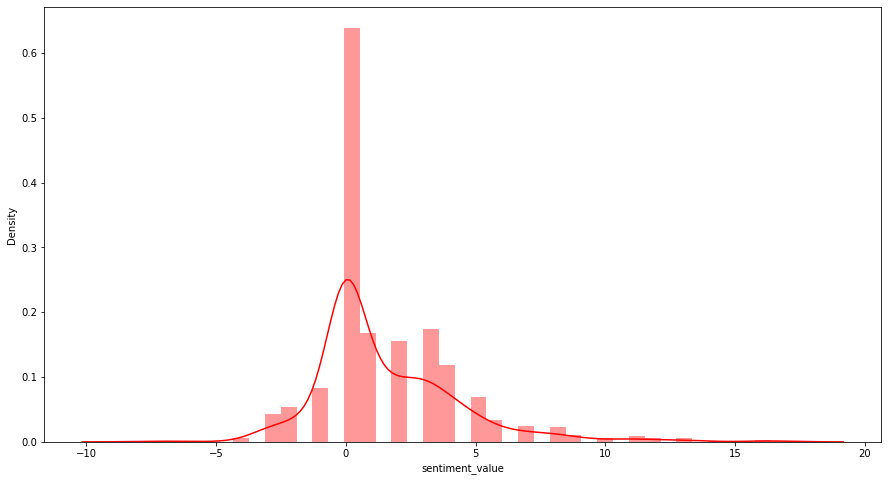

In [128]:
f, axes = plt.subplots(figsize= (15,8))
import seaborn as sns
sns.distplot(sent_df['sentiment_value'],color = "red")
plt.show()

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

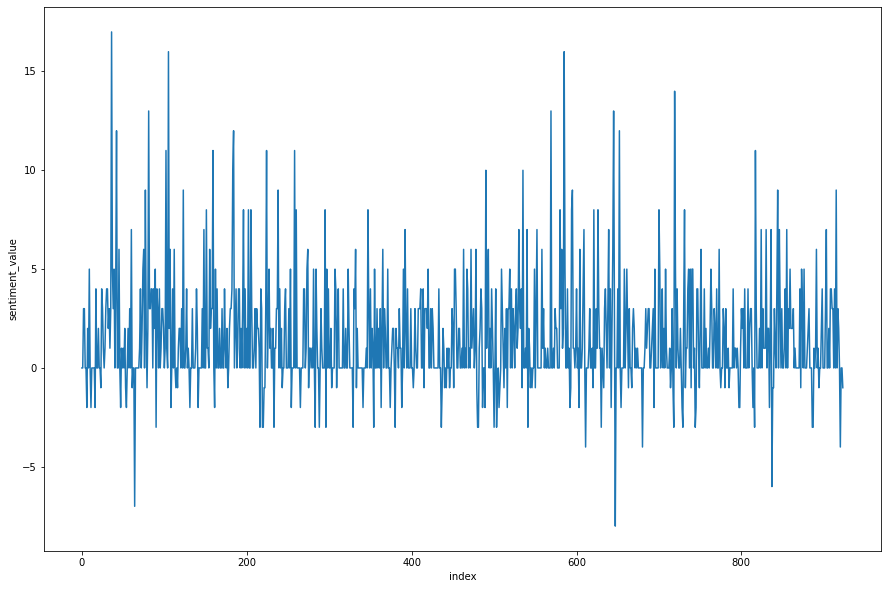

In [129]:

plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

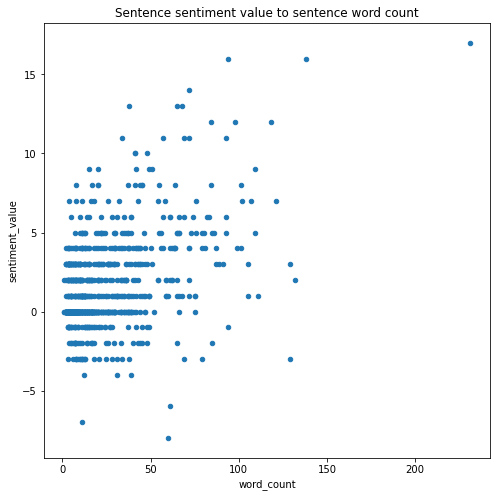

In [130]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [132]:
sent_df['Sentiment_Class'] = pd.cut(x=sent_df['sentiment_value'],bins=[-8, -1, 0, 17], 
                                    labels=['Negative','Neutral','Positive'], right = True)
sent_df.head()

,sentence,sentiment_value,word_count,index,Sentiment_Class
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0,Neutral
1,Have you tried it?,0,4,1,Neutral
2,@joerogan @Spotify Great interview!,3,4,2,Positive
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3,Positive
4,Now on to the next for even more!!,0,8,4,Neutral


In [134]:
sent_df['Sentiment_Class'].value_counts()

Positive    457
Neutral     360
Negative    106
Name: Sentiment_Class, dtype: int64

<AxesSubplot:xlabel='Sentiment_Class', ylabel='count'>

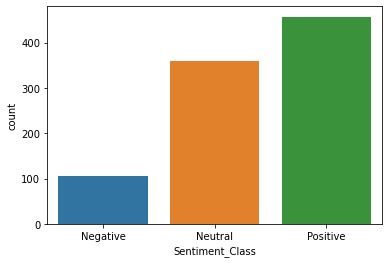

In [133]:
sns.countplot(x = 'Sentiment_Class', data = sent_df)
